# Jupyter绘制动态图，以Mnist数据集为例

## 前置工作
1. 导入相关包
2. 使用 IPython中的display模块的clear_output功能刷新输出
3. 使用命令将matplotlib绘制的图片显示在jupyter中

In [1]:
from bindsnet.datasets import MNIST, DataLoader
from torchvision import transforms
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

## 创建数据集生成器

In [2]:
local = True

dataset = MNIST(
    # PoissonEncoder(time=time, dt=dt),
    # None,
    root="data" if local else os.path.join(ROOT_DIR, "data", "MNIST"),
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
    # transform=transforms.Compose(
    #     [transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)]
    # ),
)
dataloader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    num_workers=1,
    pin_memory=False,
)

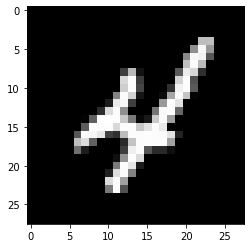

In [3]:
batch_sample = None
for step, batch in enumerate(dataloader):
    if step == 1:
        batch_sample = batch #保存一份样本查看其结构
    if step == 10: # 显示前十张图片
        break
    image = batch['image'][0][0]
    plt.imshow(image, cmap='gray') # 显示灰度图象
    plt.pause(0.2) # 刷新间隔0.2s
    display.clear_output(wait=True)

## 查看batch的结构

In [4]:
print(type(batch_sample))
print(batch_sample.keys())
print(batch_sample['image'].shape)

<class 'dict'>
dict_keys(['image', 'label', 'encoded_image', 'encoded_label'])
torch.Size([1, 1, 28, 28])
